In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

data = pd.read_excel("cleaned_825220013_Sumenep_2000_2009.xlsx")

In [8]:
data.head()


,Date,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg,Unnamed: 8,Unnamed: 9
0,2000-01-01,25,31.8,28.7,84,7.4,7,3,NaN,"Tn: ""Temperatur min"","
1,2000-01-02,24,30.4,27.0,92,0.6,8,3,NaN,"""Tx"": ""Temperatur max)"","
2,2000-01-03,24,31.1,27.0,88,1.9,8,2,NaN,"""Tavg"": ""Temperatur rata-rata"","
3,2000-01-04,25,31.8,27.8,89,0.0,4,1,NaN,"""RH_avg"": ""Kelembapan rata-rata"","
4,2000-01-05,25,31.8,28.6,86,7.4,5,2,NaN,"""ss"": ""Lama sinar matahari"","


In [9]:
column_mapping = {
    "Tn": "Temperatur minimum (°C)",
    "Tx": "Temperatur maksimum (°C)",
    "Tavg": "Temperatur rata-rata (°C)",
    "RH_avg": "Kelembapan rata-rata (%)",
    "ss": "Lama penyinaran matahari (jam)",
    "ff_x": "Kecepatan angin maksimum (m/s)",
    "ff_avg": "Kecepatan angin rata-rata (m/s)",
}

data.rename(columns=column_mapping)

,Date,Temperatur minimum (°C),Temperatur maksimum (°C),Temperatur rata-rata (°C),Kelembapan rata-rata (%),Lama penyinaran matahari (jam),Kecepatan angin maksimum (m/s),Kecepatan angin rata-rata (m/s),Unnamed: 8,Unnamed: 9
0,2000-01-01,25,31.8,28.7,84,7.4,7,3,NaN,"Tn: ""Temperatur min"","
1,2000-01-02,24,30.4,27.0,92,0.6,8,3,NaN,"""Tx"": ""Temperatur max)"","
2,2000-01-03,24,31.1,27.0,88,1.9,8,2,NaN,"""Tavg"": ""Temperatur rata-rata"","
3,2000-01-04,25,31.8,27.8,89,0.0,4,1,NaN,"""RH_avg"": ""Kelembapan rata-rata"","
4,2000-01-05,25,31.8,28.6,86,7.4,5,2,NaN,"""ss"": ""Lama sinar matahari"","
...,...,...,...,...,...,...,...,...,...,...
3568,2009-12-27,25,29.5,26.8,94,3.8,5,2,NaN,NaN
3569,2009-12-28,26,31.6,27.8,82,6.6,8,4,NaN,NaN
3570,2009-12-29,24,31.8,27.1,93,0.0,6,1,NaN,NaN
3571,2009-12-30,25,32.0,26.0,92,3.2,5,2,NaN,NaN


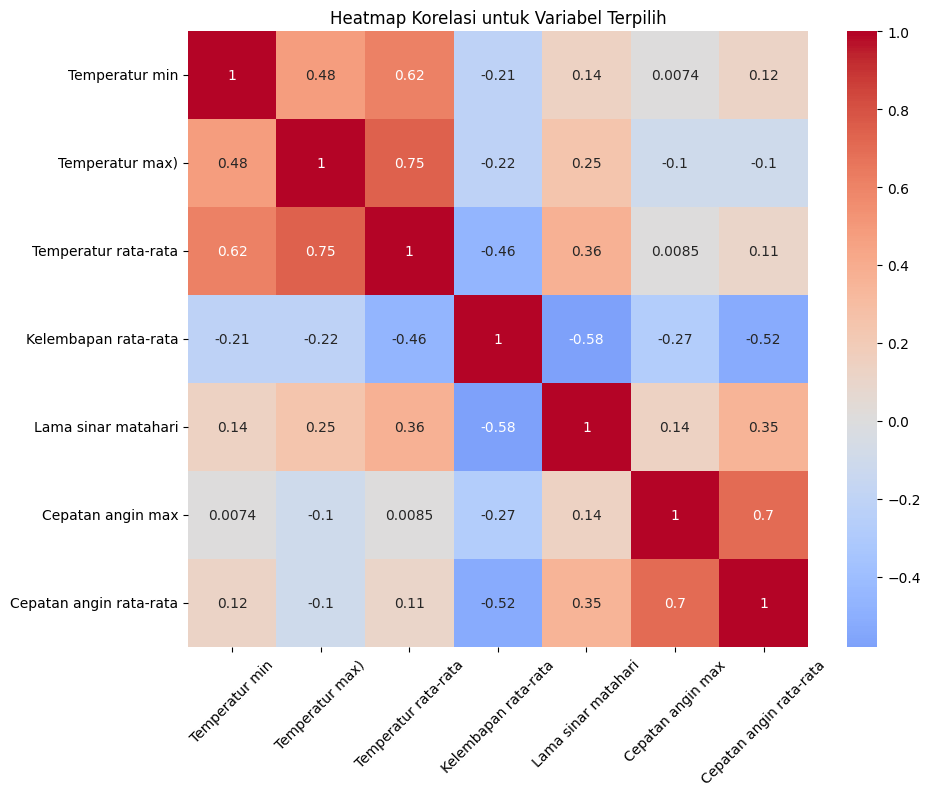

In [10]:
variables = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ff_avg']
data_selected = data[variables]
data_selected = data_selected.rename(columns={
    "Tn": "Temperatur min",
    "Tx": "Temperatur max)",
    "Tavg": "Temperatur rata-rata",
    "RH_avg": "Kelembapan rata-rata",
    "ss": "Lama sinar matahari",
    "ff_x": "Cepatan angin max",
    "ff_avg": "Cepatan angin rata-rata"
})
corr_matrix = data_selected.corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
plt.title('Heatmap Korelasi untuk Variabel Terpilih')
plt.show()

In [11]:
corr_matrix

,Temperatur min,Temperatur max),Temperatur rata-rata,Kelembapan rata-rata,Lama sinar matahari,Cepatan angin max,Cepatan angin rata-rata
Temperatur min,1.000000,0.475452,0.615419,-0.214218,0.135723,0.007438,0.119351
Temperatur max),0.475452,1.000000,0.745432,-0.216539,0.249207,-0.102015,-0.104782
Temperatur rata-rata,0.615419,0.745432,1.000000,-0.459330,0.364314,0.008474,0.107590
Kelembapan rata-rata,-0.214218,-0.216539,-0.459330,1.000000,-0.581896,-0.273176,-0.523920
Lama sinar matahari,0.135723,0.249207,0.364314,-0.581896,1.000000,0.136820,0.352854
Cepatan angin max,0.007438,-0.102015,0.008474,-0.273176,0.136820,1.000000,0.704460
Cepatan angin rata-rata,0.119351,-0.104782,0.107590,-0.523920,0.352854,0.704460,1.000000


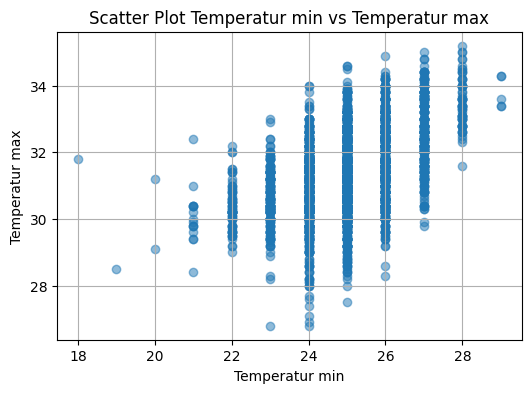

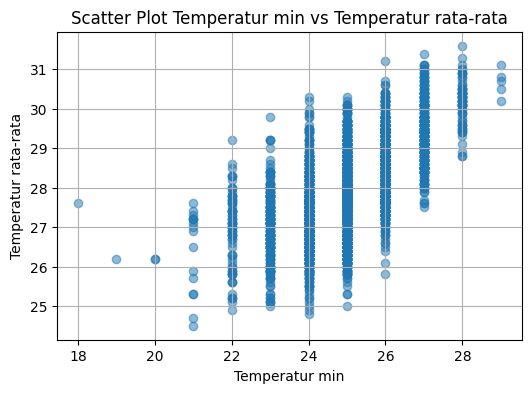

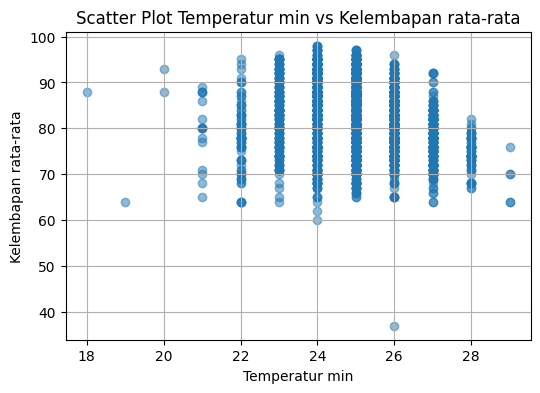

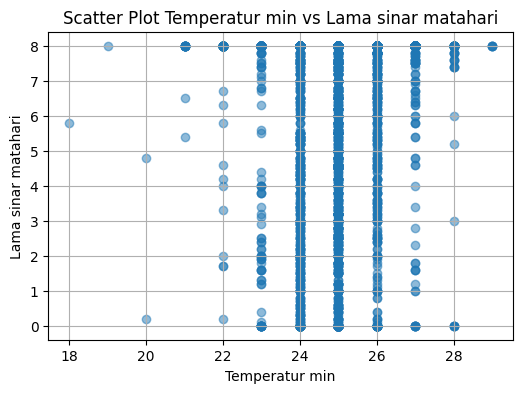

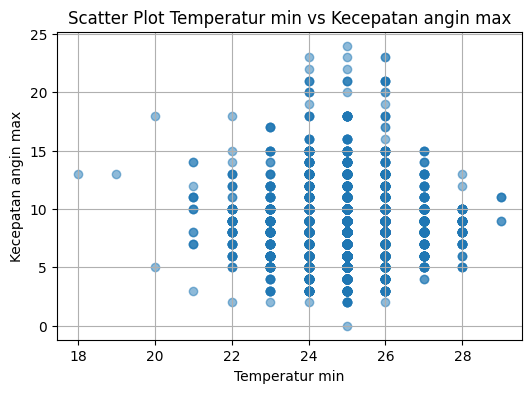

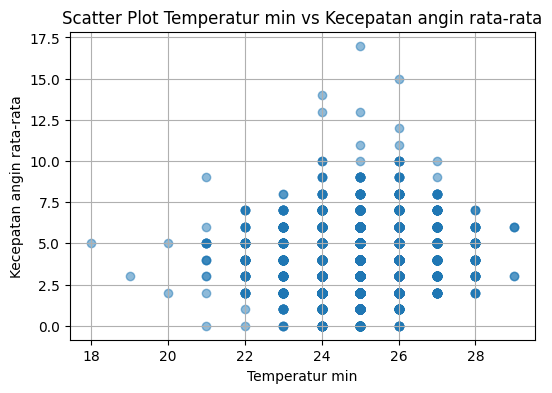

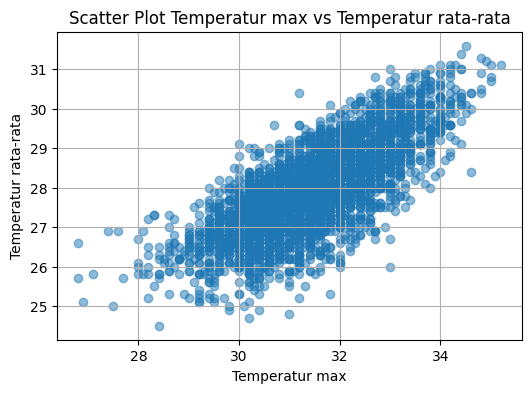

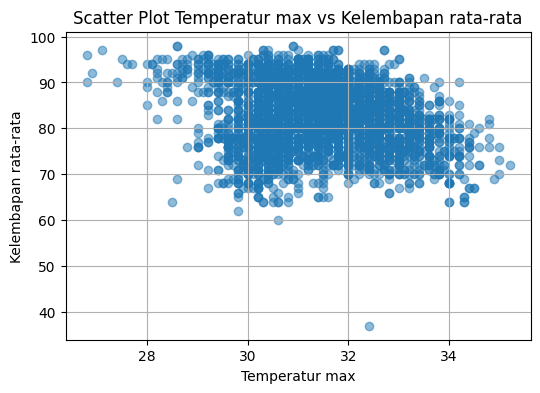

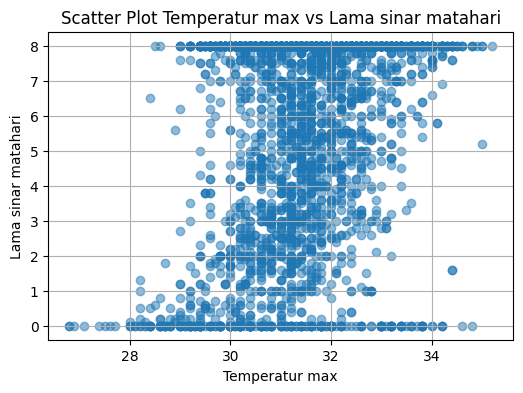

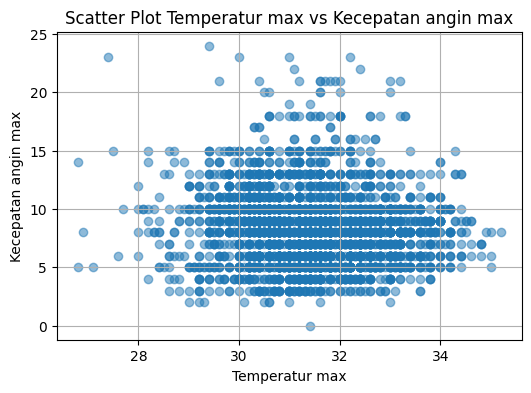

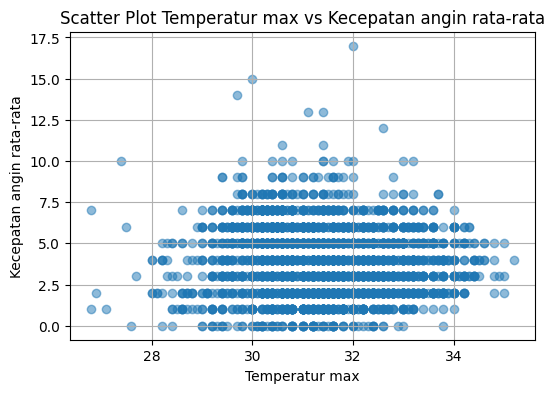

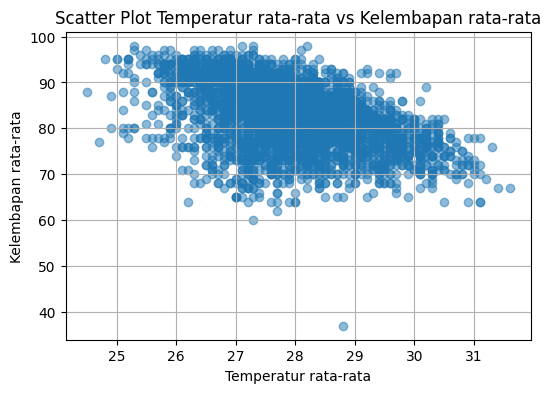

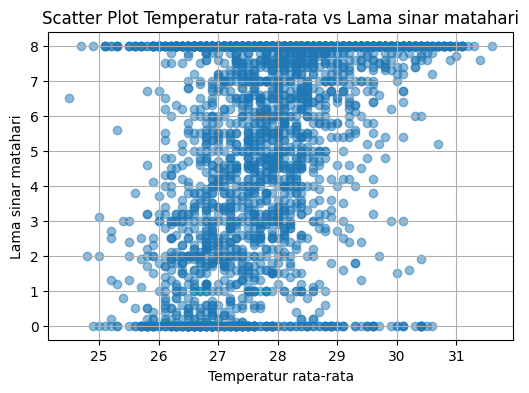

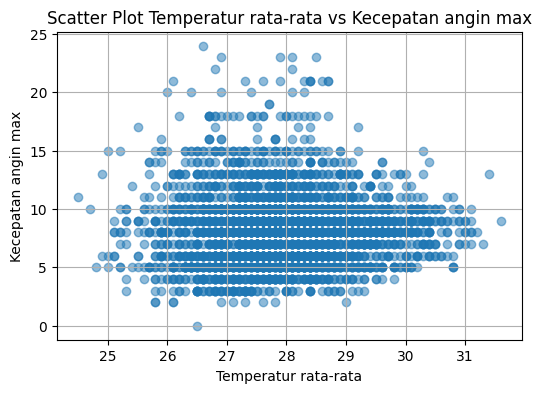

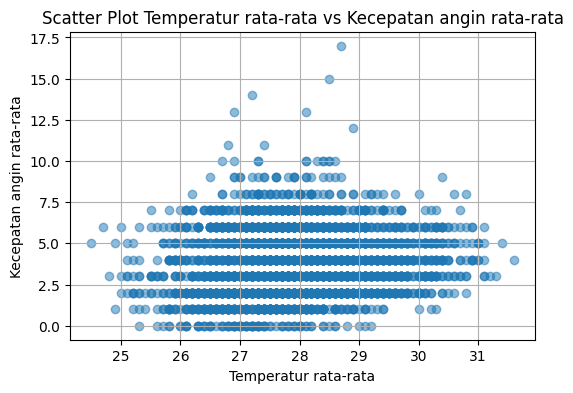

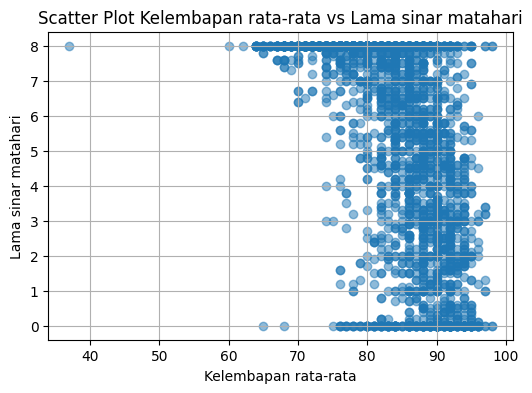

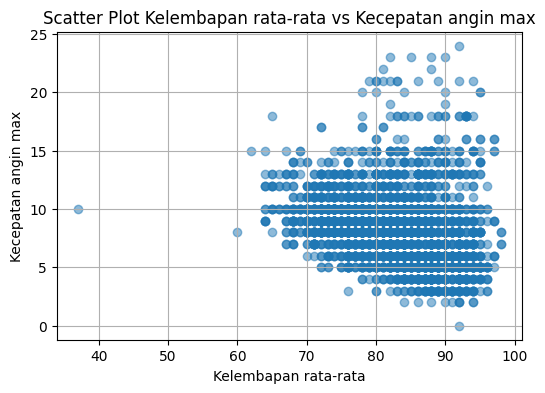

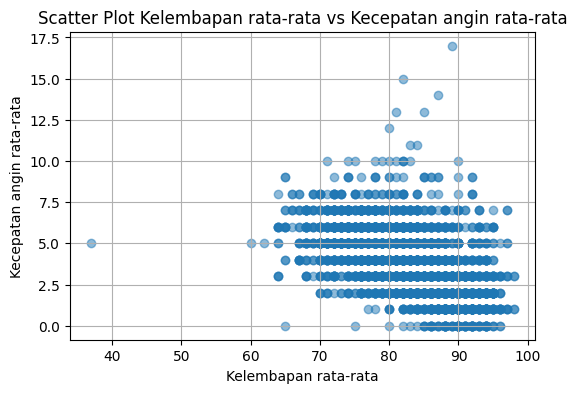

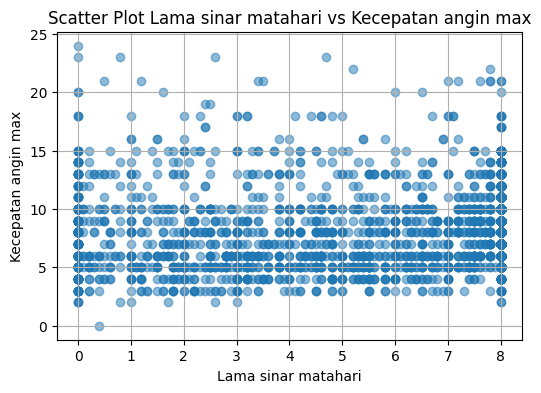

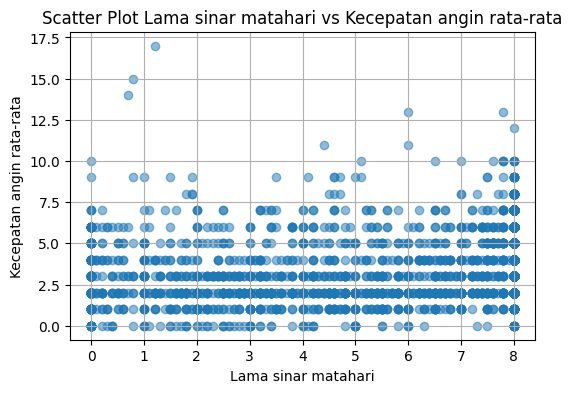

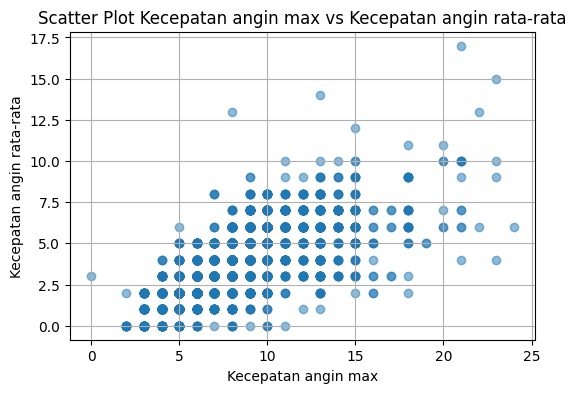

In [12]:
variables = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ff_avg']

# Memilih hanya kolom yang relevan
data_selected = data[variables]

# Mengganti nama kolom dengan nama yang lebih deskriptif
data_selected = data_selected.rename(columns={
    "Tn": "Temperatur min",
    "Tx": "Temperatur max",
    "Tavg": "Temperatur rata-rata",
    "RH_avg": "Kelembapan rata-rata",
    "ss": "Lama sinar matahari",
    "ff_x": "Kecepatan angin max",
    "ff_avg": "Kecepatan angin rata-rata"
})

def scatter_plot(df, var1, var2):
    plt.figure(figsize=(6, 4))
    plt.scatter(df[var1], df[var2], alpha=0.5)
    plt.title(f'Scatter Plot {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()
renamed_variables = data_selected.columns
for i in range(len(renamed_variables)):
    for j in range(i+1, len(renamed_variables)):
        scatter_plot(data_selected, renamed_variables[i], renamed_variables[j])